<a href="https://colab.research.google.com/github/d1p013/testing/blob/master/Copy_of_AI6122_Assignment_Simple_Search_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTerrier Indexing Demo

This notebook takes you through indexing using [PyTerrier](https://github.com/terrier-org/pyterrier).

## Prerequisites

You will need PyTerrier installed. PyTerrier also needs Java to be installed, and will find most installations.

In [1]:
!pip install python-terrier
#!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

     |████████████████████████████████| 95 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 45.3 MB/s 
     |████████████████████████████████| 69 kB 6.2 MB/s 
     |████████████████████████████████| 222 kB 61.4 MB/s 
     |████████████████████████████████| 1.8 MB 33.7 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 126 kB 64.7 MB/s 
     |████████████████████████████████| 294 kB 59.0 MB/s 
     |████████████████████████████████| 6.3 MB 21.0 MB/s 
     |████████████████████████████████| 636 kB 67.2 MB/s 
     |████████████████████████████████| 291 kB 44.6 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.7.0-py3-none-any.whl size=102213 sha256=44872eb97d40e718c8b8f8f2ec6849e62b1057e0290259e314a8d1e55cfe3d83
  Stored in directory: /root/.cache/pip/wheels/e3/84/1e/68c08f14e2481e2b3e7c1a2c24bb1220712bc3f5d3896c28df
  Created wheel for ir-measures: filen

## Init 

You must run `pt.init()` before other pyterrier functions and classes

Optional Arguments:    
 - `version` - terrier IR version e.g. "5.2"    
 - `mem` - megabytes allocated to java e.g. "4096"      
 - `packages` - external java packages for Terrier to load e.g. ["org.terrier:terrier.prf"]
 - `logging` - logging level for Terrier. Defaults to "WARN", use "INFO" or "DEBUG" for more output.

NB: PyTerrier needs Java 11 installed. If it cannot find your Java installation, you can set the `JAVA_HOME` environment variable.

In [2]:
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.6  jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6  jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


In [3]:
 #vaswani_dataset = pt.datasets.get_dataset("vaswani")
 #indexref = vaswani_dataset.get_index()
 #index = pt.IndexFactory.of(indexref)
 #print(index.getCollectionStatistics().toString()) 

In [4]:
#topics = vaswani_dataset.get_topics()
#topics.head(5) 

In [5]:
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"}, num_results=10)
#retr.setControl("wmodel", "TF_IDF")
#retr.setControls({"wmodel": "TF_IDF"})
#res=retr.transform(topics)
#res 

 ## Importing dataset from Google Drive

Using built-in function of Google Colab, we can easily import the dataset which has been uploaded onto Google Drive beforehand

need a Google account to download the data

In [6]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID which is residing on Google Drive
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# file_id = '1YkltHAl3Ro9xv25EkGB56h271_STNlPA' #'AI6122_Dataset_B1.csv'
file_id = '1aVXMJ_luTXISxMwP5_Bt2xE0ObXqEsQ2' #"Dataset_B1to8"

downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))
#downloaded.GetContentFile('AI6122_Dataset_B1.csv')
downloaded.GetContentFile('Dataset_B1to8.csv')

## Loading dataset (csv) into Pandas dataframe

pyTerrier makes it easy to index standard Python data structures, particularly [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

importing dataset, which is scale down version of the original `review.json` file as the original file is too large to load into Google Colab memory


In [37]:
## load data into df
import pandas as pd
#df = pd.read_csv("AI6122_Dataset_B1.csv", dtype = str)
df = pd.read_csv("Dataset_B1to8.csv", dtype = str)

try :
  del docno 
except:
  pass

##docno = list(range(1,len(df)+1))
##df['docno'] = docno
##df = df.astype({"docno" : str})
#print(type(df["docno"][0]))

docno =[]
for idx in range(1,len(df)+1):
  docno.append("d" + str(idx))

df["docno"] = docno


In [8]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,docno
0,5160031,1dZ2Vjex6D4FcGUvc633xw,S2IaUH7jqGg021oJ1jo27w,Slj9yz_RfDRqiMRH8VxUMQ,3,0,0,0,Really cute restaurant with lots of character....,3/23/2018 13:51,d1
1,5161915,XTOOwso4XocpgvfzUrLahQ,1-ikyrBXfTij5k6M4nTaZg,Slj9yz_RfDRqiMRH8VxUMQ,5,1,0,0,We visited when my wife and I came to Atlanta....,2/1/2018 20:08,d2
2,5162697,Dq--78gS7JHHHCoryoUSsA,1ohGAyANSWmHI1k5h5t3BA,Slj9yz_RfDRqiMRH8VxUMQ,4,0,0,0,I came here for lunch one day to pick up an or...,1/21/2018 15:25,d3
3,5162961,K1aPKM6fRpNXmpiRgjclbg,cFNmQ_EUjcNeF7aS4sz19Q,Slj9yz_RfDRqiMRH8VxUMQ,5,0,0,0,Our waitress was EXTREMELY courteous. She chec...,12/15/2017 23:56,d4
4,5164768,CM9C7n3QvBwA9nsaPRSExg,TZFhgwVEkGurFBEsqmi21A,Slj9yz_RfDRqiMRH8VxUMQ,3,1,0,0,I had the lasagna calzone. The calzone was sm...,6/7/2017 0:03,d5
...,...,...,...,...,...,...,...,...,...,...,...
6923,6908034,CtRRUmxAq0HfODwST8gosg,aQjzoc8SNx_4AtsRpjKO_Q,sjgbSELDpzaabRe8bZwUbw,5,2,0,2,GET THE POBLANO JACK SAUSAGES! As soon as I to...,43780.83669,d6924
6924,6908143,s3flK9z_AodnefTzZSLI4w,7j-CRT0QYjTl_mHzLL_udQ,sjgbSELDpzaabRe8bZwUbw,5,2,0,1,Came to Micklethwait's and was surprised the l...,42756.95071,d6925
6925,6909152,hxl3_vk_jvWNG6UB8ALqCQ,M9hpSOJG67mGXuwlansGjg,sjgbSELDpzaabRe8bZwUbw,4,4,1,3,I had time for only one barbecue place during ...,43755.8102,d6926
6926,6909297,XjlTk4oYHT0e-muMKxwa9w,fvbJChNvoxBnIztSMNqLjA,sjgbSELDpzaabRe8bZwUbw,3,0,0,0,I ordered a pound of brisket and turkey. I als...,44156.92817,d6927


## Time taken for indexing

Tracking the time to complete indexing for each 10% incremental of documents. The index folder is cleared before each indexing and time and is taken before and after indexing, the difference being the time taken to index


In [9]:
import time

Tcollect = []
for idx in range(1,11):
  #print(idx)
  df_resize = df.iloc[:int(len(df)/(10/idx)),:]
  !rm -rf ./pd_index
  pd_indexer = pt.DFIndexer("./pd_index", overwrite=True, verbose=True)
  Tstart = time.perf_counter()
  indexref = pd_indexer.index(df_resize["text"], df_resize)
  Tend = time.perf_counter()
  print(str(10*idx)+f"% df search completed in {Tend - Tstart:0.4f} seconds")
  Tcollect.append(Tend - Tstart)



  0%|          | 0/692 [00:00<?, ?documents/s]

10% df search completed in 3.8968 seconds


  0%|          | 0/1385 [00:00<?, ?documents/s]

20% df search completed in 3.8937 seconds


  0%|          | 0/2078 [00:00<?, ?documents/s]

30% df search completed in 4.1213 seconds


  0%|          | 0/2771 [00:00<?, ?documents/s]

40% df search completed in 4.1428 seconds


  0%|          | 0/3464 [00:00<?, ?documents/s]

50% df search completed in 4.7647 seconds


  0%|          | 0/4156 [00:00<?, ?documents/s]

60% df search completed in 6.0451 seconds


  0%|          | 0/4849 [00:00<?, ?documents/s]

70% df search completed in 6.5489 seconds


  0%|          | 0/5542 [00:00<?, ?documents/s]

80% df search completed in 7.1958 seconds


  0%|          | 0/6235 [00:00<?, ?documents/s]

90% df search completed in 8.0671 seconds


  0%|          | 0/6928 [00:00<?, ?documents/s]

100% df search completed in 8.8863 seconds


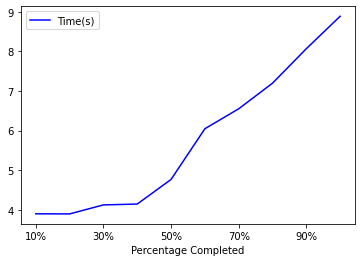

In [10]:
import matplotlib.pyplot as plt

plotdf = pd.DataFrame({
    'Percentage Completed':['10%', '20%', '30%', '40%', '50%', 
                            '60%', '70%', '80%', '90%', '100%'],
    'Time(s)':Tcollect
    })

# a scatter plot comparing num_children and num_pets
plotdf.plot(kind='line',x='Percentage Completed',y='Time(s)',color='blue')
plt.show()


## Indexing a Pandas dataframe

We can use a `pt.DFIndexer()` object to do indexing for Pandas dataframe

In [54]:
#import pandas as pd
!rm -rf ./pd_index
pd_indexer = pt.DFIndexer("./pd_index", overwrite=True, verbose=True)
# no stemming or stopwords
pd_indexer.setProperty("termpipelines", "")

# optionally modify properties
# index_properies = {"block.indexing":"true", "invertedfile.lexiconscanner":"pointers"}
# indexer.setProperties(**index_properies)
# no stemming or stopwords
# indexer.setProperty("termpipelines", "")

Then there are a number of options to index the dataframe:    
The first argument should always a pandas.Series object of Strings, which specifies the body of each document.    
Any arguments after that are for specifying metadata.

We can view more useful information from the indexed objects using a indexref.getCollectionsStatistics()

In [55]:
import time
# no metadata
# pd_indexer.index(df["text"])

# Add metadata fields as Pandas.Series objects, with the name of the Series object becoming the name of the meta field.
#indexref = pd_indexer.index(df["text"], df["docno"], df["review_id"], df["user_id"], df["business_id"], df["stars"], df["useful"], df["funny"], df["cool"])
Tstart = time.perf_counter()
indexref = pd_indexer.index(df["text"], df)
Tend = time.perf_counter()
print(f"search completed in {Tend - Tstart:0.4f} seconds")
indexinfo = pt.IndexFactory.of(indexref)
print(indexinfo.getCollectionStatistics().toString()) 
# pd_indexer.index(df["text"], df["docno"], df["url"])

# Add metadata fields as lists to a keyword arguement
# pd_indexer.index(df["text"], docno=["1","2","3"], url=["url1", "url2", "url3"])

# Add the metadata fields with a dictionary
# meta_fields={"docno":["1","2","3"],"url":["url1", "url2", "url3"]}
# pd_indexer.index(df["text"], **meta_fields)

# Add the entire dataframe as metadata
# pd_indexer.index(df["text"], df)

  0%|          | 0/6928 [00:00<?, ?documents/s]

search completed in 8.9602 seconds
Number of documents: 6928
Number of terms: 17674
Number of postings: 551216
Number of fields: 0
Number of tokens: 850337
Field names: []
Positions:   false



In the above example, the indexed collection had 6928 documents, which contained 388543-word occurrences. Out of which 12049 were identified as unique words. The total postings in the inverted index are 323743. 

The whole datafame is being index, with the `"text"` field being searchable while the remaining (e.g. `"review_id"`, `"user_id"`, `"business_id"`, `"stars"`, `"date"`, `"useful"`, `"funny"`, `"cool"`, `"text"`) as metadata which can be displayed when called upon.

pyTerrier perform standard stopwords removal and applies Porter's stemmer by default, and it is applicable in this notebook as well.
EnglishTokeniser is the default tokeniser and case-folding to lower case is applied during Tokenization

## Retrieval

Retrieval takes place using the `BatchRetrieve` object, by invoking `transform()` method for one or more queries. For a quick test, you can give just pass your query to `transform()`. 

BatchRetrieve will return the results as a Pandas dataframe.


In [13]:
#pt.BatchRetrieve(indexref).search("so many")

In [ ]:

#this ranker will make the candidate set of documents for each query
#BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"}, num_results=5)
#these rankers we will use to re-rank the BM25 results
#TF_IDF = pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"}, num_results=5)
#PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"}, num_results=5)

#pipe = BM25 >> (TF_IDF ** PL2)
#pipe.transform("really cute restaurant") 


In [15]:
#pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"}, num_results=5).search("Really cute restaurant")


In [32]:
#pt.BatchRetrieve(indexref, wmodel="BM25", properties={"termpipelines" : "Stopwords,PorterStemmer"})
#pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"}, properties={"termpipelines" : ""}, num_results=10).search("Really cute restaurant")
#pt.BatchRetrieve(indexref, metadata=["business_id", "stars"], num_results=10).search("Really cute restaurant")


,qid,docid,docno,rank,score,query
0,1,5183,d5184,0,12.877068,Really cute restaurant
1,1,0,d1,1,12.733366,Really cute restaurant
2,1,5656,d5657,2,12.292438,Really cute restaurant
3,1,5785,d5786,3,12.262675,Really cute restaurant
4,1,5237,d5238,4,11.980537,Really cute restaurant
5,1,6114,d6115,5,11.736152,Really cute restaurant
6,1,5229,d5230,6,11.426839,Really cute restaurant
7,1,5074,d5075,7,11.167639,Really cute restaurant
8,1,3274,d3275,8,11.116354,Really cute restaurant
9,1,5265,d5266,9,11.010630,Really cute restaurant


However, most IR experiments, will use a set of queries. You can pass such a set using a data frame for input.

In [17]:
#import pandas as pd
#topics = pd.DataFrame([["q1", "Really cute restaurant"], ["q2", "restaurant"]],columns=['qid','query'])
#pt.BatchRetrieve(indexref, metadata=["text"], num_results=5).transform(topics)

## Simple Search Engine

Prompting user input for search string
Prompting user input for the Top N results to return
Display the time taken to complete the search
Display the search results

In [18]:
import time
import pandas as pd
pd.reset_option('^display.', silent=True)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

search_str = input("Please enter your search string: ")
#print("Search string: ", search_str)
TopN = input("Please enter number results to display: ")
#print("Top N results: ", TopN)
Tstart = time.perf_counter()
topics = pd.DataFrame([["q1", search_str]],columns=['qid','query'])
results = pt.BatchRetrieve(indexref, metadata=["text"], num_results=int(TopN)).transform(topics)
Tend = time.perf_counter()
print(f"search completed in {Tend - Tstart:0.4f} seconds")

if len(results) == 0:
  print("no result found!")
#else:
  #print("len: ", len(results))
  #print(results)

results

Please enter your search string: xavier
Please enter number results to display: 5
search completed in 0.0650 seconds
no result found!


,docid,text,rank,score,qid,query


Thats the end of the indexing tutorial - you can continue with other example tutorials.